In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

from CSV_Handler import CSV_Handler
from scipy.interpolate import interp1d

In [3]:
BSCCO_data, BSCCO_interp_fxn = {},{}
DyBCO_data, DyBCO_interp_fxn = {},{}

"""
csvh = CSV_Handler('Basov_BSCCO2212_10K.csv',  '10K', data, opt_consts = ['e1ab','e2ab'])
csvh = CSV_Handler('Basov_BSCCO2212_50K.csv',  '50K', data, opt_consts = ['e1ab','e2ab'])
csvh = CSV_Handler('Basov_BSCCO2212_80K.csv',  '80K', data, opt_consts = ['e1ab','e2ab'])    
csvh = CSV_Handler('Basov_BSCCO2212_100K.csv', '100K', data, opt_consts = ['e1ab','e2ab'])   
csvh = CSV_Handler('Basov_BSCCO2212_200K.csv', '200K', data, opt_consts = ['e1ab','e2ab'])    
csvh = CSV_Handler('Basov_BSCCO2212_295K.csv', '295K', data, opt_consts = ['e1ab','e2ab'])
csvh = CSV_Handler('Bi2212_fit_e1_6K.csv', '10K', data, opt_consts = ['e1c'])
csvh = CSV_Handler('Bi2212_fit_e2_6K.csv', '10K', data, opt_consts = ['e2c'])
csvh = CSV_Handler('Bi2212_fit_e1_100K.csv', '100K', data, opt_consts = ['e1c'])
csvh = CSV_Handler('Bi2212_fit_e2_100K.csv', '100K', data, opt_consts = ['e2c'])
"""
csvh = CSV_Handler('Bi2212_k_Tu_e1ab_e2ab_Tajima_e1c_e2c_10K.csv', '10K', BSCCO_data, datadir="./Collated_Data/", opt_consts = ['e1ab','e2ab','e1c','e2c'])
csvh = CSV_Handler('Bi2212_k_Tu_e1ab_e2ab_Tajima_e1c_e2c_300K.csv', '300K', BSCCO_data, datadir="./Collated_Data/", opt_consts = ['e1ab','e2ab','e1c','e2c'])

csvh = CSV_Handler('DyBCO_e1_e2_model_10K.csv', '10K', DyBCO_data, datadir="./Data/DyBCO", opt_consts = ['e1ab','e2ab'])
csvh = CSV_Handler('DyBCO_e1_e2_model_100K.csv', '100K', DyBCO_data, datadir="./Data/DyBCO", opt_consts = ['e1ab','e2ab'])

In [4]:
def show_data_avail(data):
    for temp in data.keys():
        print(temp+':')
        for oc in data[temp].keys():
            if oc[:2]!="k_":
                print("\t{}".format(oc))

def calculate_loss(data):
    for temp in data.keys():
        directions = []
        for oc in data[temp].keys():
            if "k_" not in oc and "loss_" not in oc:
                d = oc[2:]
                if d not in directions:
                    directions.append(d)
        for d in directions:
            e1 = np.array(data[temp]['e1'+d])
            e2 = np.array(data[temp]['e2'+d])
            eps = e1+1j*e2
            loss = np.imag(-1/eps)
            data[temp]['loss_'+d] = loss
calculate_loss(BSCCO_data)
calculate_loss(DyBCO_data)
show_data_avail(DyBCO_data)

10K:
	e1ab
	e2ab
	loss_ab
100K:
	e1ab
	e2ab
	loss_ab


/home/meberko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/meberko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [5]:
def plot_opt_consts(data,opt_consts=['e1ab'],
                    temps = None,axis=None, save=False, show_hyperbolic=False,
                    logx=False, logy=False):
    NAME_DICT = { 'e1ab': '\epsilon_{1ab}', 'e2ab': '\epsilon_{2ab}', 'e1c': '\epsilon_{1c}', 'e2c': '\epsilon_{2c}'}
    fig = plt.figure()
    ocs = []
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('symlog', linthresh=1e-1)
    if temps is None:
        temps = data.keys()
    for temp in temps:
        for oc in opt_consts:
            lab = '${}$('.format(NAME_DICT[oc])+temp+')'
            x_data, y_data = data[temp]['k_'+oc], data[temp][oc]
            f_interp = interp1d(x_data, y_data, kind = 'cubic')
            x_interp = np.linspace(np.min(x_data), np.max(x_data), 10*len(x_data))
            ocs.append(f_interp(x_interp))
            plt.plot(x_interp, f_interp(x_interp), label=lab)

    plt.legend()
    plt.xlabel("k (cm$^{-1}$)")
    plt.ylabel("${}$".format(NAME_DICT[opt_consts[0]]))
    if show_hyperbolic:
        plt.fill_between(x_interp,-1e5,1e5, color="#9BFF8B", where=ocs[0]*ocs[1]<0)
    if axis is not None:
        plt.axis(axis)
    fname = "{}_{}.png".format('_'.join(opt_consts), '_'.join(temps))
    if save:
        plt.savefig(fname, dpi=300)


In [6]:
def plot_loss(data, directions=['ab'], temps=None, axis=None, save=False, logx=False, logy=False, interp=False):
    fig = plt.figure()
    if logx:
        plt.xscale('log')
    if logy:
        plt.yscale('symlog')
    if temps is None:
        temps = data.keys()
    for temp in temps:
        for direction in directions:
            lab = '$-\Im(\epsilon_{'+direction+'}^{-1})$('+temp+')'
            x_data = data[temp]['k_e1'+direction]
            y_data = data[temp]["loss_"+direction]
            f_interp = interp1d(x_data, y_data, kind="cubic")
            x_interp = np.linspace(np.min(x_data), np.max(x_data), 2*len(x_data))
            if interp:
                plt.plot(x_interp, f_interp(x_interp), label=lab)
            else:
                plt.plot(x_data, y_data, label=lab)

    plt.legend()
    plt.xlabel("k (cm$^{-1}$)")
    plt.ylabel("$-\Im(\epsilon^{-1})$")
    if axis is not None:
        plt.axis(axis)
    fname = "{}_{}.png".format('loss_'+'_'.join(directions), '_'.join(temps))
    if save:
        plt.savefig(fname, dpi=300)


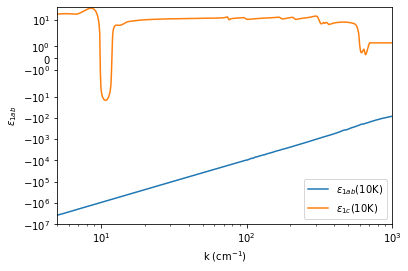

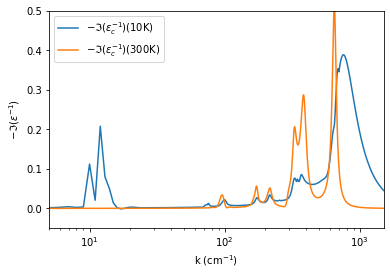

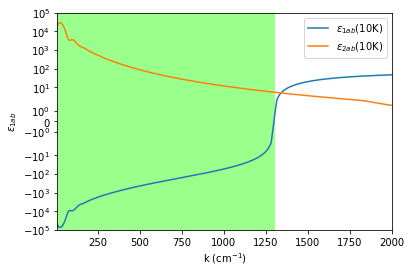

In [9]:
plot_opt_consts(BSCCO_data,
                opt_consts=['e1ab','e1c'], temps=['10K'],
                axis=[5,1000,-1e7,40],
                logx=True, logy=True,
                save=False)

plot_loss(BSCCO_data,
          directions=['c'], temps=['10K', '300K'],
          axis=[5,1500,-0.05,0.5],
          logx=True, logy=False,
          save = True)

plot_opt_consts(DyBCO_data,
                opt_consts=['e1ab','e2ab'], temps=['10K'],
                axis=[10,2000,-1e5,1e5],
                logx=False, logy=True,
                save=False, show_hyperbolic=True)

In [30]:
def save_data(data, source='', material='BSCCO', opt_consts = ['e1ab'], temps = None):
    if temps is None:
        temps = list(data.keys())
    labels = ['k'] + opt_consts
    for temp in temps:
        fname = '_'.join([source, material, '_'.join(labels), temp])
        with open(fname, 'w') as csvf:
            writer = csv.writer(csvf, delimiter=',')
            nrows = len(data[temp]['k_'+opt_consts[0]])
            writer.writerow(labels)
            for i in range(nrows):
                row = []
                row.append(data[temp]['k_'+opt_consts[0]][i])
                for oc in opt_consts:
                    row.append(data[temp][oc][i])
                writer.writerow(row)
    
save_data(data,
          source = "Zelenzy_2002",
          material = "BSCCO2212",
          opt_consts = ['e1ab', 'e2ab'])

NameError: name 'data' is not defined